<i><b>Public-AI</b></i>
# Face Detection

## _Objective_
 - Face detection에 배워 봅니다. 
 - 머신러닝 방식으로 얼굴의 위치를 파악한 `Haar Classifier`를 배워보도록 하겠습니다.
 - OpenCV을 활용해 haar classifier 을 구현해 봅니다. 
 - Haar Classifier 의 한계와 이미지에서 얼굴을 탐지하기 어려운 이유를 배워봅니다.
 

## 1. face detection 이란?
 - 이미지 영상에서 사람 얼굴의 위치를 찾아내는 기술.
 ![Imgur](https://i.imgur.com/ZUDn9Wm.jpg)

![Imgur](https://i.imgur.com/rCPUFiA.png)

## \[ 고전 머신러닝 방법 : Haar Cascades Classifier Detection Algorithm \]
---

## 1. Haar Cascades Classifier란?
 - Pual viola, Michael Jones 가 발표, **'Rapid Object Detection using a Boosted Cascade of Simple Features'**
 - Haar Feature 기반 Cascade classifier(다단계 분류기) 를 이용한 객체 검출기

 - Haar Like Featuers(by Alfréd Haar) 을 사용
     - Haar Wavelet 과 비슷한 아이디어를 가진 Feature Extractor 을 개발

딥러닝이 도입되기 전, **Haar Cascades**는 물체 검출에 있어서 보편적으로 쓰인 알고리즘입니다.



### 1.1 Basic Idea
- 이미지에서 객체에서 변하지 않는 feature(특징)들을 찾아낸다. 
- 이미지 내에서 찾아낸 모든 특징들이 검출되는 영역을 제공한다.




- Haar Like features

![Imgur](https://i.imgur.com/HwDQE6B.png)
- Haar Features 을 사용하여 Face Detection 하는 idea
![Imgur](https://i.imgur.com/7xKrNRf.png)

![Imgur](https://i.imgur.com/I3Eoq9N.png)

### 1.1 Integral Image 

- 위 방식으로는 너무나 많은 계산량을 요구
- 계산을 효과적으로 하는 방법: Integral Image 
 - Time Complexity 변호 :  $O(N^2)$ → $O(1)$
![Imgur](https://i.imgur.com/ZdHmLXr.png)




### 1.2. adaboost 을 활용한 분류기 만들기 
 - adaboost 은 boosting-meta algorithm 중 하나입니다. 
     - boosting-meta-algorithm 은 하 는 여러가지 알고리즘을 하나의 데이터에 적용하는 앙상블 대표적인 방법중 하나입니다. 
     
![Imgur](https://i.imgur.com/g4E1DQF.png)

 

### 1.3. Cascade Classifier

1. 객체 크기(object size)에 알맞는 window 사이즈를 지정합니다.
2. window 가 슬라이드 하면서 Cascade 방법을 사용해 얼굴 이미지를 추출합니다. 
 - 가장 정확도가 높은 feature을 사용해서 window 에 threshold가 넘는지 안 넘는지 확인합니다. 
 - 합격하면 다음 정확도가 높은 feature을 사용해 해당 윈도우에 feature가 있는지 없는지 확인합니다. 
 - 모두 다 있으면 객체라고 인식합니다. 
 - 해당 윈도우를 반환합니다.
 ![Imgur](https://i.imgur.com/dKhEvD7.png)

### 1.4. OpenCV을 활용해서 구현하기

#### ① 필요 라이브러리 불러오기



In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from tensorflow.keras.utils import get_file

#### ② 데이터 가져오기

In [3]:
src_url = "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/face-recognition/"

fpaths = {}
for fname in ['crowd.jpg', 'closeup.jpg', 'selfie.jpg']:
    # 로컬에 다운로드된 파일의 경로를 제공 
    # ex) home/contents/crowd.jpg
    fpaths[os.path.splitext(fname)[0]] = get_file(fname, os.path.join(src_url, fname))
    
fpaths

{'crowd': '/Users/publicai/.keras/datasets/crowd.jpg',
 'closeup': '/Users/publicai/.keras/datasets/closeup.jpg',
 'selfie': '/Users/publicai/.keras/datasets/selfie.jpg'}

#### ③ 데이터 시각화

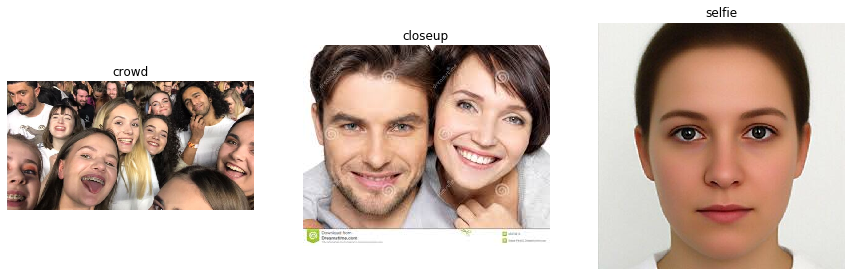

In [69]:
fig, axes = plt.subplots(1,3, figsize=(15,15))

for ind, (img_name, img_path) in enumerate(fpaths.items()):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[ind].imshow(img)
    axes[ind].set_title(img_name)
    axes[ind].axis('off')
    


#### ④ 흑백으로 변환하기

$$
Y = 0.299R + 0.587G + 0.114B
$$

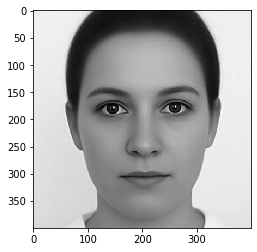

In [28]:
# color 2 gray 

gray_img = np.sum(img * np.array([0.299, 0.587, 0.114]), axis=-1)
plt.imshow(gray_img, cmap='gray')

opencv에서는 아래와 같이 간단하게 흑백으로 바꿀 수 있습니다.

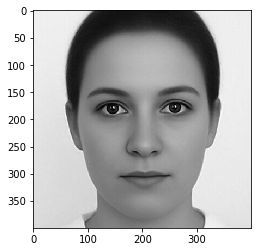

In [30]:
grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img, cmap='gray')

#### ⑥ Model로 결과 추론하기

In [116]:
fpath = get_file('haarcascade.xml',
    'https://pai-datasets.s3.ap-northeast-2.amazonaws.com/face-recognition/haarcascade.xml')
model = cv2.CascadeClassifier(fpath)

모델의 주요 인자는 아래와 같습니다.

* image : 얼굴을 검출하고자 하는 영상
* ScaleFactor : 찾으려는 얼굴의 크기를 몇 가지 다른 크기로 할지 결정(1.1이 default)
* minSize : 검출할 얼굴의 최소 크기를 결정
* minNeighbors : 검출기가 검출한 얼굴이 확실한지 결정하는 인자(3이 기본, 높을수록 확실한 얼굴만 잡음)

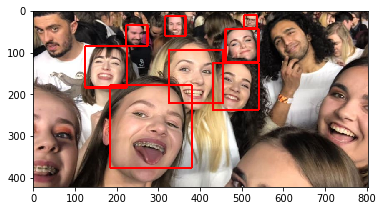

In [146]:
img = cv2.imread(fpaths['crowd'])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = model.detectMultiScale(image=img, 
                       scaleFactor=1.1,
                       minNeighbors=2,
                       minSize=(10,10))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img)
    

#### ⑦ 결과 시각화하기

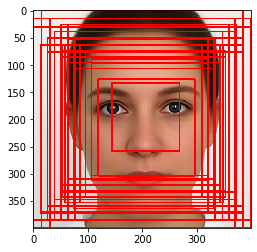

In [68]:
plt.imshow(img)
for (x1, y1, w, h) in faces:
    cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (255, 0 ,0), 2)

plt.imshow(img)
plt.show()
    

## 2. Haar Cascades의 한계

### \[ 영상에서 얼굴을 찾기 어렵게 하는 6가지 요소 \] 
---

- 

<img src="https://i.imgur.com/byt5YJ1.jpg" width="800">

얼굴을 영상에서 찾는다는 것은 위와 같은 다양한 문제들이 결부되어 있습니다.


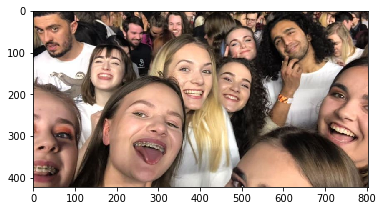

In [31]:
# # 이미지를 읽기
# fpath = fpaths['crowd']
# img = cv2.imread(fpath)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.show()

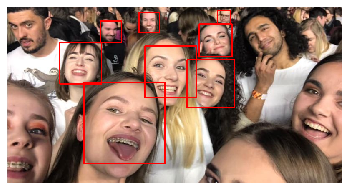

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = model.detectMultiScale(gray,
                               scaleFactor=1.2,
                               minNeighbors=2,
                               minSize=(10,10))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
plt.imshow(img)
plt.axis('off')
plt.show()

머신러닝 방식으로 동작하였을 때에는 위와 같이 놓치고 있는 얼굴들이 많습니다. 딥러닝을 활용하여 개선해보도록 하겠습니다.

<img src="https://i.imgur.com/Yfqg30o.png" align="middle"></img>
---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI

---